# Laboratorio: Métodos de búsqueda

En las clases anteriores creaste códigos para realizar búsquedas aleatorias (Simulated Annealing) y búsquedas dirigidas (Optimización Bayesiana). Estos métodos de búsqueda se utilizan para facilitar el proceso de optimización de funciones objetivos compleja y costosas de computar.

En este laboratorio usaremos el dataset de los diferentes tipos de iris, y sus longitudes y anchos de pétalos y sépalos. Utilizaremos un RandomForest para crear un modelo de clasificación y el métrico F1 para decidir cuál es el mejor modelo de acuerdo a lo que tenemos disponible.

1. Carga el dataset de Iris

In [3]:
from sklearn import datasets
X, y = datasets.load_iris(return_X_y=True)

2. Importa el archivo `Bosque.py`.

Este archivo contiene la función `RegresionBosque`, que recibe:
- X: las características independientes
- y: la variable de respuesta
- árboles: cantidad total de árboles
- profundidad de bosque: niveles de profundidad del bosque

Su salida es:
- modelo: El objeto con el modelo ajustado
- f1: El métrico que califica qué tan bueno es el modelo que se ajustó.


In [6]:
import Bosque
modelo, f1 = Bosque.RegresionBosque(X, y, 10, 3)
f1

0.9444444444444444

### Actividad 1:

Inicializa un espacio con 5 muestras en nuestro dominio de variables independientes:
- árboles: números enteros entre 5 y 50.
- profundidad: números enteros entre 2 y 10

Utiliza optimización Bayesiana para encontrar la combinación de árboles y profundidad que **maximice** el métrico F1.

(array([14, 41, 20,  5, 33]), array([ 2,  3, 10,  2, 10]))

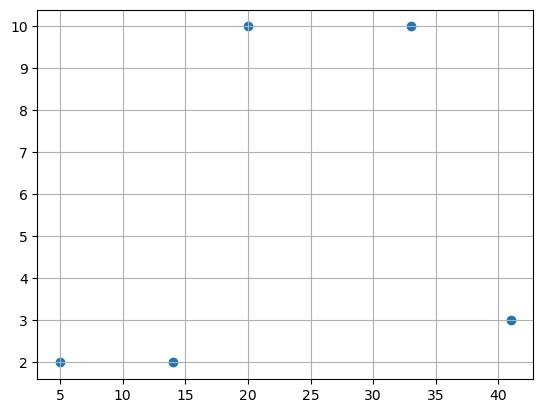

In [11]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(10)
arboles=np.random.randint(5,51,5)
profundidad=np.random.randint(2,11,5)
#x = np.random.uniform(np.pi, np.pi, 5).reshape([-1, 1])
plt.figure(); plt.scatter(arboles, profundidad, plt.grid())
#plt.figure(); plt.scatter(profundidad, arboles, plt.grid())
arboles,profundidad

In [13]:
combinacion=[]
def optimizar(X,y,arboles, profundidad):
    return Bosque.RegresionBosque(X, y, arboles, profundidad)
for i in range (5):
    arboles=np.random.randint(5,51)
    profundidad=np.random.randint(2,11)
    valor=optimizar(X,y,arboles, profundidad)
    combinacion.append(valor)
combinacion

[(RandomForestClassifier(max_depth=5, n_estimators=41), 0.9555555555555556),
 (RandomForestClassifier(max_depth=10, n_estimators=16), 0.9555555555555556),
 (RandomForestClassifier(max_depth=10, n_estimators=37), 0.9444444444444444),
 (RandomForestClassifier(max_depth=4, n_estimators=38), 0.9555555555555556),
 (RandomForestClassifier(max_depth=2, n_estimators=21), 0.9333333333333333)]

In [15]:
def optimizar(X,y):
    return Bosque.RegresionBosque(X,y)

combinacion = []
for i in range(5):
    arboles = np.random.randint(5, 51)
    profundidad = np.random.randint(2, 11)
    valor = f1(X,y,arboles, profundidad)  # Llama a la función f1
    combinacion.append(valor)

mejor_combinacion = max(combinaciones, key=lambda x: x[2])
mejor_combinacion

TypeError: 'numpy.float64' object is not callable

### Actividad 2:

Inicializa 2 vectores con posibles valores para las variables independientes:
- árboles: números enteros entre 5 y 50
- profundidad: números enteros entre 2 y 10

Utiliza el algoritmo de Simulated Annealing que siga el siguiente orden:
- Elige un punto de partida para las variables.
- Selecciona al azar una de las dos para modificarlas.
- Selecciona un elemento al azar de la lista que contiene los posibles valores de esa variable.
- Sigue el algoritmo ($p$ y $q$) para decidir si usas esa combinación nueva o si mantienes la anterior.

In [ ]:
import numpy as np
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(10)
arboles=np.random.randint(5,51)
profundidad=np.random.randint(2,11)

def calcular_f1(arboles, profundidad):
    modelo = RandomForestClassifier(n_estimators=arboles, max_depth=profundidad)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=10)
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X_test)
    return f1_score(y_test, predicciones, average="micro")

def simulated_annealing():
    arboles_actual = random.choice(arboles_posibles)
    profundidad_actual = random.choice(profundidad_posibles)
    f1_actual = calcular_f1(arboles_actual, profundidad_actual)
    temperatura = 1.0
    temperatura_minima = 0.01
    enfriamiento = 0.99
    
    while temperatura > temperatura_minima:
        if random.choice([True, False]):  # True para árboles, False para profundidad
            nueva_variable = 'arboles'
            nuevo_valor = random.choice(arboles_posibles)
        else:
            nueva_variable = 'profundidad'
            nuevo_valor = random.choice(profundidad_posibles)

        # Crear nuevas combinaciones
        if nueva_variable == 'arboles':
            arboles_nuevo = nuevo_valor
            profundidad_nueva = profundidad_actual
        else:
            arboles_nuevo = arboles_actual
            profundidad_nueva = nuevo_valor
        
   
        f1_nuevo = calcular_f1(arboles_nuevo, profundidad_nueva)
        delta_f1 = f1_nuevo - f1_actual
        
        if delta_f1 > 0 or np.exp(delta_f1 / temperatura) > random.random():
            arboles_actual = arboles_nuevo
            profundidad_actual = profundidad_nueva
            f1_actual = f1_nuevo
        
        temperatura *= enfriamiento
    return arboles_actual, profundidad_actual, f1_actual


mejor_arboles, mejor_profundidad, mejor_f1 

In [ ]:
import numpy as np
import Bosque
from sklearn import datasets

arboles = np.arange(5, 51)  # Valores posibles para 'árboles'
profundidad = np.arange(2, 11)  # Valores posibles para 'profundidad'

np.random.seed(10)
arboles_actual = np.random.choice(arboles)
profundidad_actual = np.random.choice(profundidad)
T_inicial = 1000  # Temperatura inicial
T_final = 1  # Temperatura final
alpha = 0.85  # Factor de enfriamiento

modelo, f1_actual = Bosque.RegresionBosque(X, y, arboles_actual, profundidad_actual)
T = T_inicial
historial_f1 = []

for i in range(30):
    if T < T_final:
        break

    variables = np.random.choice([0, 1])
    if variables == 0:
        nuevo_arboles = np.random.choice(arboles)
        nuevo_profundidad = profundidad_actual
    else:
        nuevo_arboles = arboles_actual
        nuevo_profundidad = np.random.choice(profundidad)

    modelo, f1_nueva = Bosque.RegresionBosque(X, y, nuevo_arboles, nuevo_profundidad)
    delta_f1 = f1_nueva - f1_actual

 
    if delta_f1 > 0:
        # Aceptamos si la nueva combinación es mejor
        arboles_actual = nuevo_arboles
        profundidad_actual = nuevo_profundidad
        f1_actual = f1_nueva
    else:
        p = np.exp(delta_f1 / T)
        if np.random.rand() < p:
            arboles_actual = nuevo_arboles
            profundidad_actual = nuevo_profundidad
            f1_actual = f1_nueva
    T = T * alpha
    historial_f1.append(f1_actual)

arboles_actual,profundidad_actual,f1_actual